# EECS 16A Linear Systems Demo
v1 - Fall 19: Neelesh Ramachandran



Welcome to this interactive jupyter notebook demo, where you can manipulate lines through their slope and intercept to visualize when and how they intersect. 

There are 3 situations which we can create regarding the number of solutions to our system of linear equation (here, 2 equations in 2 variables). Can you discover them all? What relationships between the interactive variables (m1, m2, b1, b2) produce each number of solutions?

<IPython.core.display.Javascript object>


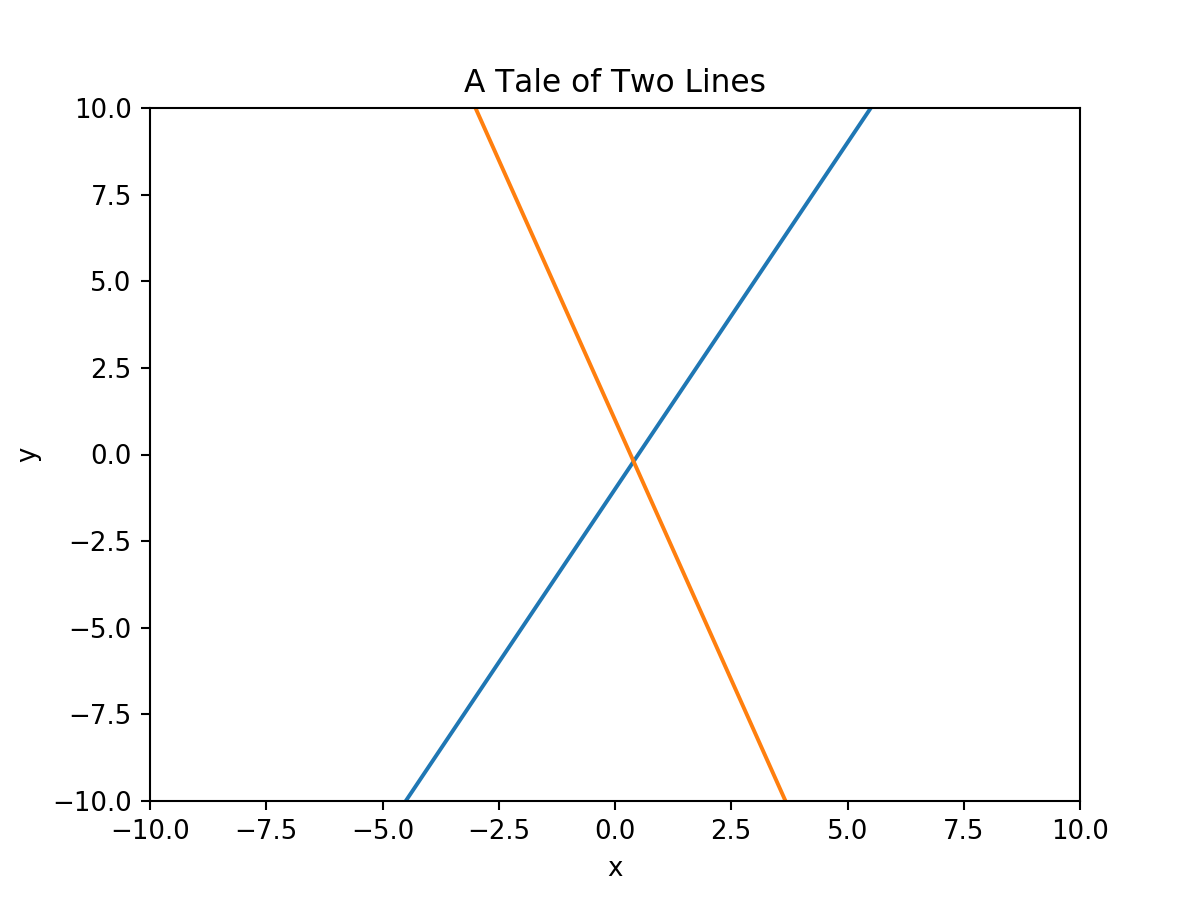

interactive(children=(FloatSlider(value=2.0, description='m1', max=15.0, min=-10.0), FloatSlider(value=-1.0, description='b1', max=3.0, min=-5.0), FloatSlider(value=-3.0, description='m2', max=10.0, min=-15.0), FloatSlider(value=1.0, description='b2', max=5.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

In [67]:
# necessary imports for interactivity and plot generation
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

HINT = True

# generate range of x-values
x = np.linspace(-10, 10)

# configure plot and axes limits
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])

# axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title("A Tale of Two Lines")

# create lines and set stage for interactivity.
line, = ax.plot(x, x)
line2, = ax.plot(x, x)

# interactively update points on each line and draw result.
def update(m1, b1, m2, b2, **kwargs):
    line.set_ydata(m1*x+b1)
    line2.set_ydata(m2*x+b2)
    fig.canvas.draw_idle()
    
    # if HINT enabled, then solve system and display useful information about the solution set.
    if HINT:
        u = Symbol('x')
        v = Symbol('y')
        sols = solve([m1*u + b1-v, m2*u +b2-v], u,v)
        sols = {x.name : sols[x] for x in sols}
        if len(sols) == 0:
            print("No solutions exist for these lines!")
        elif len(sols) == 2:
            print(f"A unique solution exists for these lines at ({sols['x']:.3f}, {sols['y']:.3f})!")
        else:
            print("The lines overlap! An infinite number of solutions exist!")


# interactively change slopes and intercepts for both lines formatted as (start, stop, step size) for each. 
# Feel free to play around with these!
interact(update, m1=(-10, 15, 0.1), b1=(-5, 3,0.1), m2=(-15, 10, 0.1), b2=(-3, 5,0.1));